### *GIỚI THIỆU : 

<span style='color:blue'>Dimensionality Reduction (giảm chiều dữ liệu),là một trong những kỹ thuật quan trọng trong Machine Learning. Các feature vectors trong các bài toán thực tế có thể có số chiều rất lớn, tới vài nghìn. Ngoài ra, số lượng các điểm dữ liệu cũng thường rất lớn. Nếu thực hiện lưu trữ và tính toán trực tiếp trên dữ liệu có số chiều cao này thì sẽ gặp khó khăn cả về việc lưu trữ và tốc độ tính toán. Vì vậy, giảm số chiều dữ liệu là một bước quan trọng trong nhiều bài toán. Đây cũng được coi là một phương pháp nén dữ liệu.
<span style='color:blue'>
Dimensionality Reduction, nói một cách đơn giản, là việc đi tìm một hàm số, hàm số này lấy đầu vào là một điểm dữ liệu ban đầu 
x
∈
R
D
 với 
D
 rất lớn, và tạo ra một điểm dữ liệu mới 
z
∈
R
K
 có số chiều 
K
<
D
.

<img src='https://machinelearningcoban.com/assets/21_kernelsvm/4.png
    ' style="width:500px;"/>
<img src='https://machinelearningcoban.com/assets/21_kernelsvm/6.png
    ' style="width:500px;"/>
>

### *INPUT : CHO DATASET GỒM CÁC ĐIỂM DỮ LIỆU X1,X2,...,XN ∈ RD, CÁC ĐIỂM DỮ LIỆU CÓ TỌA ĐỘ (x1,x2,...,xn)


### *CÁC BƯỚC THỰC HIỆN

### BƯỚC 1 : TÍNH VECTOR KÌ VỌNG CỦA BỘ DỮ LIỆU 

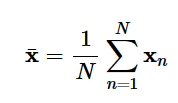

### BƯỚC 2 : TÍNH TOÁN ĐỘ LỆCH SO VỚI VECTOR KÌ VỌNG

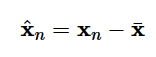

### BƯỚC 3 : TÍNH MA TRẬN HIỆP PHƯƠNG SAI 

<SPAN STYLE='color:blue'>MA TRẬN HIỆP PHƯƠNG SAI LÀ MA TRẬN THỂ HIỆN MỐI QUAN HỆ GIỮA CÁC BIẾN TRONG 1 TẬP DỮ LIỆU ĐA BIẾN, MỖI PHẦN TỬ CỦA MA TRẬN HIỆP PHƯƠNG SAI ĐẶC TRƯNG CHO ĐỘ TƯƠNG QUAN VỀ ĐỘ LỆCH CỦA CÁC ĐIỂM DỮ LIỆU ĐỐI VỚI VECTOR TRUNG BÌNH .

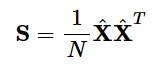

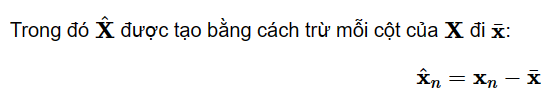

### BƯỚC 4 : TÍNH CÁC VECTOR RIÊNG VÀ GIÁ TRỊ RIÊNG CÓ CHUẨN BẰNG 1 CỦA MA TRẬN, SẮP XẾP VECTOR RIÊNG THEO THỨ TỰ GIẢM DẦN CỦA GÍA TRỊ RIÊNG, CHỌN K VECTOR RIÊNG PHÙ HỢP

<SPAN STYLE='color:blue'>VECTOR RIÊNG X CỦA MA TRẬN A LÀ VECTOR KHI NHÂN X VÀO A SẼ KHÔNG LÀM THAY ĐỔI PHƯƠNG CHIỀU CỦA X MÀ CHỈ LÀM THAY ĐỔI CHUẨN CỦA X 


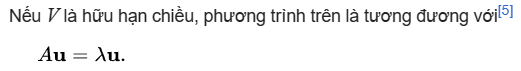 


DO ĐÓ KHI TÍNH TOÁN CÁC VECTOR RIÊNG CỦA MA TRẬN HIỆP PHƯƠNG SAI SẼ CHO BIẾT ĐƯỢC CHIỀU HƯỚNG VARIANCE LỚN NHẤT CỦA DỮ LIỆU

### BƯỚC 5 : TÌM KHÔNG GIAN CON PHÙ HỢP VỚI CÁC VECTOR RIÊNG ĐÃ CHỌN

<SPAN STYLE='color:blue'>THỰC HIỆN CHUYỂN K VECTOR RIÊNG VỀ HỆ TRỰC GIAO RỒI CHIẾU DỮ LIỆU BAN ĐẦU VỀ KHÔNG GIAN MỚI THEO CÔNG THỨC



### CHƯƠNG TRÌNH THỰC HIỆN THUẬT TOÁN PCA VỚI DỮ LIỆU 2 CHIỀU 

In [1]:
import numpy as np

def pca(data, num_components):
    # Trung bình của các cột
    mean = np.mean(data, axis=0)
    
    # Trừ đi giá trị trung bình để chuẩn hóa dữ liệu
    centered_data = data - mean
    
    # Tính ma trận hiệp phương sai
    covariance_matrix = np.cov(centered_data, rowvar=False)
    print("COVARRIANCE_MATRIX")
    print(covariance_matrix)
    # Tính các vector riêng và giá trị riêng của ma trận hiệp phương sai
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    print("EIGENVALUES : ",eigenvalues)
    print("EIGENVECTOR : ",eigenvectors)
    # Sắp xếp các vector riêng theo giá trị riêng giảm dần
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Chọn ra các thành phần chính
    principal_components = sorted_eigenvectors[:, :num_components]
    
    # Chiếu dữ liệu vào không gian của các thành phần chính
    projected_data = np.dot(centered_data, principal_components)
    
    return projected_data, principal_components, mean
n_component=1
# Dữ liệu mẫu 2 chiều
data = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])

# Áp dụng PCA
projected_data, principal_components, mean = pca(data,n_component)

print("Projected Data:")
print(projected_data)
print("\nPrincipal Components:")
print(principal_components)
print("\nMean:")
print(mean)

COVARRIANCE_MATRIX
[[2.5 2.5]
 [2.5 2.5]]
EIGENVALUES :  [5.0000000e+00 4.4408921e-16]
EIGENVECTOR :  [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Projected Data:
[[-2.82842712]
 [-1.41421356]
 [ 0.        ]
 [ 1.41421356]
 [ 2.82842712]]

Principal Components:
[[0.70710678]
 [0.70710678]]

Mean:
[3. 4.]


### THƯ VIỆN SCIKIT-LEARN


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer
# Đọc dữ liệu từ sklearn
cancer_set = load_breast_cancer()

# Chuyển thành DataFrame
cancer_data = pd.DataFrame(data=cancer_set ['data'], columns=cancer_set['feature_names'])

cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<span style='color:blue'>CHUẨN HÓA DỮ LIỆU

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit vào dữ liệu
scaler.fit(cancer_data)

# Thực hiện transform scale
scale_cancer_data = scaler.transform(cancer_data)

<SPAN STYLE='color:blue'>GIẢM CHIỀU DỮ LIỆU

In [6]:
from sklearn.decomposition import PCA

# Khởi tạo đối tượng PCA với số comp = 2
my_pca = PCA (n_components = 2 )

# Fit vào data
my_pca.fit(scale_cancer_data)

# Thực hiện transform 
pca_scale_cancer_data = my_pca.transform(scale_cancer_data)

print("Dữ liệu gốc: ", scale_cancer_data.shape)

print("Dữ liệu sau PCA:" , pca_scale_cancer_data.shape)

Dữ liệu gốc:  (569, 30)
Dữ liệu sau PCA: (569, 2)


<SPAN STYLE='color:blue'>SCATTER

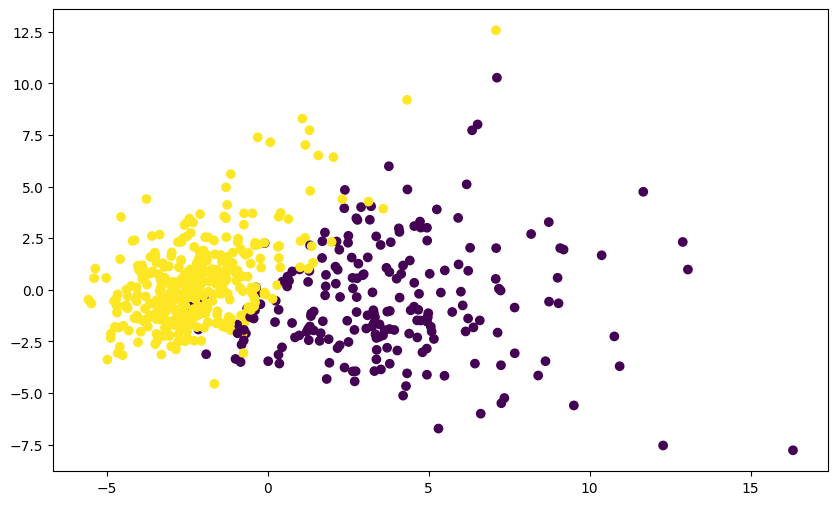

In [7]:
plt.figure(figsize = (10,6))
# Thành phần comp số 1
pca_1 = pca_scale_cancer_data[:, 0]
# Thành phần comp số 2
pca_2 = pca_scale_cancer_data[:, 1]

# Vẽ đồ thị
plt.scatter(x=pca_1, y = pca_2, c = cancer_set['target'])

In [8]:
scale_cancer_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [9]:
projected_data, principal_components, mean=pca(scale_cancer_data,2)

COVARRIANCE_MATRIX
[[ 1.00176056e+00  3.24351929e-01  9.99612069e-01  9.89095475e-01
   1.70881506e-01  5.07014640e-01  6.77955036e-01  8.23976636e-01
   1.48001350e-01 -3.12179472e-01  6.80285970e-01 -9.74887767e-02
   6.75358538e-01  7.37159198e-01 -2.22992026e-01  2.06362656e-01
   1.94545531e-01  3.76831225e-01 -1.04504545e-01 -4.27163418e-02
   9.71245907e-01  2.97530545e-01  9.66835698e-01  9.42739295e-01
   1.19826732e-01  4.14190751e-01  5.27839123e-01  7.45524434e-01
   1.64241985e-01  7.07832563e-03]
 [ 3.24351929e-01  1.00176056e+00  3.30113223e-01  3.21650988e-01
  -2.34296930e-02  2.37118951e-01  3.02950254e-01  2.93980713e-01
   7.15266864e-02 -7.65717560e-02  2.76354360e-01  3.87037830e-01
   2.82169018e-01  2.60302460e-01  6.62542133e-03  1.92312595e-01
   1.43545353e-01  1.64139495e-01  9.14323671e-03  5.45533955e-02
   3.53193674e-01  9.13650301e-01  3.58669926e-01  3.44150782e-01
   7.76398084e-02  2.78318729e-01  3.01555198e-01  2.95835766e-01
   1.05192783e-01  1.1

In [10]:
projected_data

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

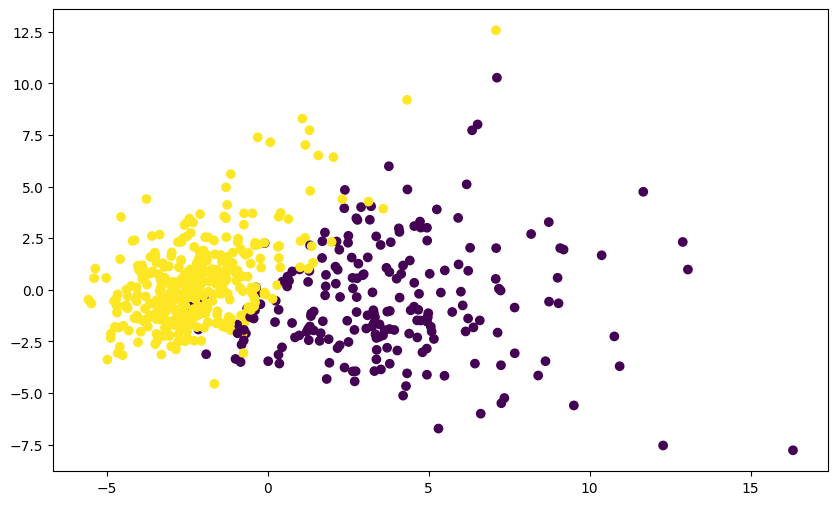

In [11]:
plt.figure(figsize = (10,6))
# Thành phần comp số 1
pca_1 = projected_data[:, 0]
# Thành phần comp số 2
pca_2 = projected_data[:, 1]
# Vẽ đồ thị
plt.scatter(x=pca_1, y = pca_2, c = cancer_set['target'])

In [12]:
np.isclose(projected_data,pca_scale_cancer_data)


array([[ True,  True],
       [ True,  True],
       [ True,  True],
       ...,
       [ True,  True],
       [ True,  True],
       [ True,  True]])